In [17]:
#!/usr/bin/env python3
"""
part2.py

UNSW COMP9444 Neural Networks and Deep Learning

ONLY COMPLETE METHODS AND CLASSES MARKED "TODO".

DO NOT MODIFY IMPORTS. DO NOT ADD EXTRA FUNCTIONS.
DO NOT MODIFY EXISTING FUNCTION SIGNATURES.
DO NOT IMPORT ADDITIONAL LIBRARIES.
DOING SO MAY CAUSE YOUR CODE TO FAIL AUTOMATED TESTING.
"""
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt


class LinearModel:
    def __init__(self, num_inputs, learning_rate):
        """
        Model is very similar to the Perceptron shown in Lectures 1c, slide 12, except that:
        (1) the bias is indexed by w(n+1) rather than w(0), and
        (2) the activation function is a (continuous) sigmoid rather than a (discrete) step function.

        x1 ----> * w1 ----\
        x2 ----> * w2 -----\
        x3 ----> * w3 ------\
        ...
                             \
        xn ----> * wn -------+--> s --> activation ---> z
        1  ----> * w(n+1) --/
        """
        self.num_inputs = num_inputs
        self.lr = learning_rate
        self.weights = np.asarray([1.0, -1.0, 0.0])  # Initialize as straight line

    def activation(self, x):
        """
        TODO: Implement a sigmoid activation function that accepts a float and returns
        a float, but raises a Value error if a boolean, list or numpy array is passed in
        hint: consider np.exp()
        """
        a = 1/(1 + np.exp(-x))
        return a

    def forward(self, inputs):
        """
        TODO: Implement the forward pass (inference) of a the model.

        inputs is a numpy array. The bias term is the last element in self.weights.
        hint: call the activation function you have implemented above.
        """
        Z = self.activation((np.dot(self.weights[:2].T,inputs) + self.weights[-1]))
        return Z

    @staticmethod
    def loss(prediction, label):
        """
        TODO: Return the cross entropy for the given prediction and label
        hint: consider using np.log()
        """
#         m = label.shape[0]
#         print(prediction, label)
#         print("--------")
        Loss = -label*np.log(prediction) + (1-label) *np.log(1-prediction)
        return Loss

    @staticmethod
    def error(prediction, label):
        """
        TODO: Return the difference between the label and the prediction

        For example, if label= 1 and the prediction was 0.8, return 0.2
                     if label= 0 and the preduction was 0.43 return -0.43
        """
        return label - prediction

    def backward(self, inputs, diff):
        """
        TODO: Adjust self.weights by gradient descent

        We take advantage of the simplification shown in Lecture 2b, slide 23,
        to compute the gradient directly from the differential or difference
        dE/ds = z - t (which is passed in as diff)

        The resulting weight update should look essentially the same as for the
        Perceptron Learning Rule (shown in Lectures 1c, slide 11) except that
        the error can take on any continuous value between -1 and +1,
        rather than being restricted to the integer values -1, 0 or +1.

        Note: Numpy arrays are passed by reference and can be modified in-place
        """
        dW = inputs * diff
        db = diff

        self.weights[-1] += self.lr * db; # update bias
        self.weights[:2] += self.lr * dW; # update weights
        
        
    def plot(self, inputs, marker):
        """
        Plot the data and the decision boundary
        """
        xmin = inputs[:, 0].min() * 1.1
        xmax = inputs[:, 0].max() * 1.1
        ymin = inputs[:, 1].min() * 1.1
        ymax = inputs[:, 1].max() * 1.1

        x = np.arange(xmin * 1.3, xmax * 1.3, 0.1)
        plt.scatter(inputs[:25, 0], inputs[:25, 1], c="C0", edgecolors='w', s=100)
        plt.scatter(inputs[25:, 0], inputs[25:, 1], c="C1", edgecolors='w', s=100)

        plt.xlim((xmin, xmax))
        plt.ylim((ymin, ymax))
        plt.plot(x, -(self.weights[0] * x + self.weights[2]) / self.weights[1], marker, alpha=0.6)
        plt.title("Data and decision boundary")
        plt.xlabel("x1")
        plt.ylabel("x2").set_rotation(0)


def main():
    inputs, labels = pkl.load(open("../data/binary_classification_data.pkl", "rb"))

    epochs = 400
    model = LinearModel(num_inputs=inputs.shape[1], learning_rate=0.01)

    for i in range(epochs):
        num_correct = 0
        for x, y in zip(inputs, labels):
            # Get prediction

            output = model.forward(x)
            
            # Calculate loss
            cost = model.loss(output, y)

#             # Calculate difference or differential
            diff = model.error(output, y)

#             # Update the weights
            model.backward(x, diff)

#             # Record accuracy
            preds = output > 0.5  # 0.5 is midline of sigmoid
            num_correct += int(preds == y)
            

        print(f" Cost: {cost:8.6f} Accuracy: {num_correct / len(inputs) * 100}%")
        model.plot(inputs, "C2--")
    model.plot(inputs, "k")
    plt.show()

 Cost: -0.354550 Accuracy: 44.0%
 Cost: -0.333254 Accuracy: 52.0%
 Cost: -0.316702 Accuracy: 56.00000000000001%
 Cost: -0.303785 Accuracy: 57.99999999999999%
 Cost: -0.293676 Accuracy: 64.0%
 Cost: -0.285758 Accuracy: 66.0%
 Cost: -0.279562 Accuracy: 72.0%
 Cost: -0.274730 Accuracy: 72.0%
 Cost: -0.270987 Accuracy: 74.0%
 Cost: -0.268118 Accuracy: 74.0%
 Cost: -0.265952 Accuracy: 74.0%
 Cost: -0.264356 Accuracy: 74.0%
 Cost: -0.263222 Accuracy: 76.0%
 Cost: -0.262465 Accuracy: 76.0%
 Cost: -0.262013 Accuracy: 78.0%
 Cost: -0.261811 Accuracy: 78.0%
 Cost: -0.261812 Accuracy: 78.0%
 Cost: -0.261977 Accuracy: 82.0%
 Cost: -0.262276 Accuracy: 84.0%
 Cost: -0.262683 Accuracy: 84.0%
 Cost: -0.263177 Accuracy: 84.0%
 Cost: -0.263739 Accuracy: 84.0%
 Cost: -0.264356 Accuracy: 84.0%
 Cost: -0.265015 Accuracy: 84.0%
 Cost: -0.265707 Accuracy: 84.0%
 Cost: -0.266422 Accuracy: 84.0%
 Cost: -0.267155 Accuracy: 84.0%
 Cost: -0.267900 Accuracy: 84.0%
 Cost: -0.268651 Accuracy: 84.0%
 Cost: -0.269406 

 Cost: -0.315274 Accuracy: 88.0%
 Cost: -0.315283 Accuracy: 88.0%
 Cost: -0.315291 Accuracy: 88.0%
 Cost: -0.315299 Accuracy: 88.0%
 Cost: -0.315306 Accuracy: 88.0%
 Cost: -0.315313 Accuracy: 88.0%
 Cost: -0.315320 Accuracy: 88.0%
 Cost: -0.315327 Accuracy: 88.0%
 Cost: -0.315334 Accuracy: 88.0%
 Cost: -0.315340 Accuracy: 88.0%
 Cost: -0.315346 Accuracy: 88.0%
 Cost: -0.315351 Accuracy: 88.0%
 Cost: -0.315357 Accuracy: 88.0%
 Cost: -0.315362 Accuracy: 88.0%
 Cost: -0.315367 Accuracy: 88.0%
 Cost: -0.315372 Accuracy: 88.0%
 Cost: -0.315376 Accuracy: 88.0%
 Cost: -0.315380 Accuracy: 88.0%
 Cost: -0.315384 Accuracy: 88.0%
 Cost: -0.315388 Accuracy: 88.0%
 Cost: -0.315391 Accuracy: 88.0%
 Cost: -0.315394 Accuracy: 88.0%
 Cost: -0.315397 Accuracy: 88.0%
 Cost: -0.315400 Accuracy: 88.0%
 Cost: -0.315403 Accuracy: 88.0%
 Cost: -0.315405 Accuracy: 88.0%
 Cost: -0.315407 Accuracy: 88.0%
 Cost: -0.315409 Accuracy: 88.0%
 Cost: -0.315411 Accuracy: 88.0%
 Cost: -0.315412 Accuracy: 88.0%
 Cost: -0.

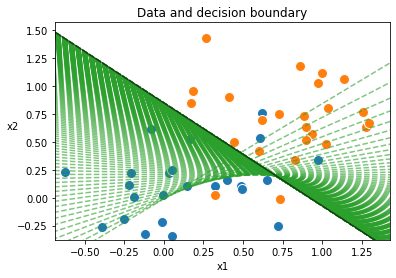

In [18]:
main()